In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression, LassoCV, RidgeCV, Lasso
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation
from keras.utils import to_categorical
from keras import layers
import keras
import itertools
from sklearn.utils import resample
from keras.utils import np_utils
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from time import time
import xgboost as xgb
import pydotplus
from sklearn import tree
from IPython.display import Image

def correlation_matrix(df):
    corr=df.corr()
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
def plot_box_plot(dataframe_slice, column_name='age', exceptions=[]):
    #gives individual boxplot with all step names
    list_ = dataframe_slice.columns.tolist()
    for column in list_:
        if column in exceptions:
            continue
        else:
            bp = dataframe_slice.boxplot(column=column)
            plt.show(bp)
            plt.clf()
            plt.cla()
            plt.close()
            
def plot_histogram_balancing(dataframe,class_name):
    print(dataframe[class_name].value_counts().to_dict())
    plt.show(dataframe.hist(column=class_name, color='red'))
    plt.clf()
    plt.cla()
    plt.close()
    
def balance_classes_down_sampling(df, class_name, majority_value, minority_value):
    # Separate majority and minority classes
    df_majority = df[df[class_name]==majority_value]
    df_minority = df[df[class_name]==minority_value]
    df = df[df[class_name]!=majority_value]
    df = df[df[class_name]!=minority_value]
    
    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    df = pd.concat([df, df_downsampled])

    # Display new class counts
    return df

def balance_classes_up_sampling(df, class_name, majority_value, minority_value):
    # Separate majority and minority classes
    df_majority = df[df[class_name]==majority_value]
    df_minority = df[df[class_name]==minority_value]
    df = df[df[class_name]!=majority_value]
    df = df[df[class_name]!=minority_value]
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    df = pd.concat([df, df_upsampled])
    # Display new class counts
    return df

def plot_confusion_matrix(conf_matrix, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if classes:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
def compute_confusion_matrix(cnf_matrix, classes_):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    if classes_:
        plot_confusion_matrix(cnf_matrix, classes=classes_,
                      title='Confusion matrix, without normalization')
    else:
        plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
        
    # Plot normalized confusion matrix
    plt.figure()
    if classes_:
        plot_confusion_matrix(cnf_matrix, classes=classes_, normalize=True,
                      title='Normalized confusion matrix')
    else:
        plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')
        
def RegBay(Modelo, x_train, y_train, x_test, y_test): 
    model = MultiOutputRegressor(Modelo(n_iter=1000, tol=0.1, alpha_1=1e-04, alpha_2=1e-04))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1, endpoint=False)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")
    
def RegLassoCV(Modelo, x_train, y_train, x_test, y_test): 
    model = MultiOutputRegressor(Modelo(max_iter=5000, tol=0.01, alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 1000.0], cv=2))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1, endpoint=False)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")

def RegRidgeCV(Modelo, x_train, y_train, x_test, y_test): 
    model = MultiOutputRegressor(Modelo(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 1000.0]))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1, endpoint=False)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")
    
def Class(modelo, x_train, y_train, x_test, y_test, classes_=None):
    knn = modelo()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
#     print("F1 Score: ", f1_score(y_test, y_pred, average='weighted')) 
    compute_confusion_matrix(confusion_matrix(y_test, y_pred), classes_)
#     print("Confusion Matrix: ", )

def ClassGeneral(modelo, x_train, y_train, x_test, y_test, classes_=None):
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
#     print("F1 Score: ", f1_score(y_test, y_pred, average='weighted')) 
    compute_confusion_matrix(confusion_matrix(y_test, y_pred), classes_)
#     print("Confusion Matrix: ", )
        

def CutDataset(dataset, entrada, saida, fora): 
    y = dataset.drop(labels=[entrada[0]], axis=1)
    x = dataset.drop(labels=[saida[0]], axis=1)
    
    for i in entrada[1:]:
        y = y.drop(labels=[i], axis=1)

    for i in saida[1:]:
        x = x.drop(labels=[i], axis=1)  
        
    for i in fora:
        x = x.drop(labels=[i], axis=1)  
        y = y.drop(labels=[i], axis=1)

    return x, y        
    
def NewColumn(corners, data, colunaHome, colunaAway, colunaTipo):                 
    for i in range(0, 20):
        corners[i][colunaTipo] = (corners[i][colunaTipo]/(len(data)/10))
    data[colunaHome] = 0
    data[colunaAway] = 0
    for i in range(0, 20):
        indexH = data.index[data['HomeTeam'] == corners[i][0]].tolist()
        data = data.set_value(indexH, colunaHome, corners[i][colunaTipo], takeable=False)
        indexA = data.index[data['AwayTeam'] == corners[i][0]].tolist()
        data = data.set_value(indexA, colunaAway, corners[i][colunaTipo], takeable=False)
        
def Fduplicated(x_train, y_train):
    
    season9 = x_train.loc[dataset['Season'] == 9]
    season8 = x_train.loc[dataset['Season'] == 8]
    season7 = x_train.loc[dataset['Season'] == 7]
    
    yseason9 = y_train.loc[dataset['Season'] == 9]
    yseason8 = y_train.loc[dataset['Season'] == 8]
    yseason7 = y_train.loc[dataset['Season'] == 7]
        
    for i in range(1,5):
        season9=season9.append(season9) 
    
    for i in range(1,2):
        season8=season8.append(season8) 
    
    season7=season7.append(season7) 
    
    for i in range(1,5):
        yseason9=yseason9.append(yseason9) 
    
    for i in range(1,2):
        yseason8=yseason8.append(yseason8) 
        
    yseason7=yseason7.append(yseason7) 
        
    x_train = x_train.append(season7)
    x_train = x_train.append(season8)
    x_train = x_train.append(season9)
    y_train = y_train.append(yseason7)
    y_train = y_train.append(yseason8)
    y_train = y_train.append(yseason9)
    
    return x_train, y_train

def preprocess_features(df, ignore_list=[]):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    print(columnsToEncode)
    for feature in columnsToEncode:
        try:
            if not (feature in ignore_list):
                print('Feature being encoded %s...' % feature)
                dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=False)
    #           df[feature] = pd.Categorical(dataset[feature]).codes
                df = df.drop(labels=[feature],axis=1)
                df = pd.concat([df, dummies], axis=1)
        except:
            print('Error encoding ' + feature)
    return df

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        for feature in columnsToEncode:
            try:
                print('Feature being encoded %s...' % feature)
#                dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=False)
                df[feature] = pd.Categorical(dataset[feature]).codes
#                df = pd.concat([df, dummies], axis=1)
            except:
                print('Error encoding '+feature)
        return df
    
def select_sets(df, input_set, output_set):
    input_list = []
    filter_col_total = []
    for input_ in input_set:
        if '_' in input_:
            filter_col = [col for col in df.keys() if col.startswith(input_)]
            filter_col_total.extend(filter_col)
#             input_list.extend(filter_col)
        else:
            input_list.append(input_)
    filter_col_total.extend(input_list)
#     display(filter_col_total)
    X = df[filter_col_total]
    X = scale_data(X,input_list)
    
    output_list = []
    for input_ in output_set:
        if '_' in input_:
            filter_col = [col for col in df.keys() if col.startswith(input_)]
            output_list.extend(filter_col)
        else:
            output_list.append(input_)
    Y = df[output_list]
    
    return X, Y

def scale_data(df, scale_list):
#     scale = StandardScaler()
    scaler = MinMaxScaler()     
    df[scale_list] = scaler.fit_transform(df[scale_list])
        
    return df

def plot_decision_tree(decision_tree, features, classes):
    # Create DOT data
    dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=features,  
                                class_names=classes)
    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)
    # Show graph
    display(Image(graph.create_png()))


# Treinamento e Modelos de Avaliação

In [26]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ('Trained model in {:.4f} seconds'.format(end - start))
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ('Made predictions in {:.4f} seconds.'.format(end - start))
    target_len = len(set(target))
    average = 'binary'
    if target_len > 2:
        average = 'micro'
        
    return y_pred,f1_score(target, y_pred, average=average), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test, classes_=None):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ('Training a {} using a training set size of {}. . .'.format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
      
    
    y_pred,f1, acc = predict_labels(clf, X_test, y_test)
    print ('F1 score and accuracy score for test set: {:.4f} , {:.4f}.'.format(f1 , acc))
    compute_confusion_matrix(confusion_matrix(y_test, y_pred), classes_)

In [27]:
data_0910 = pd.read_csv('09-10.csv')
data_1011 = pd.read_csv('10-11.csv')
data_1112 = pd.read_csv('11-12.csv')
data_1213 = pd.read_csv('12-13.csv')
data_1314 = pd.read_csv('13-14.csv')
data_1415 = pd.read_csv('14-15.csv')
data_1516 = pd.read_csv('15-16.csv')
data_1617 = pd.read_csv('16-17.csv')
data_1718 = pd.read_csv('17-18.csv')
data_1819 = pd.read_csv('18-19.csv')

In [28]:
#Atribuindo coluna Season
data_0910['Season'] = 0
data_1011['Season'] = 1
data_1112['Season'] = 2
data_1213['Season'] = 3
data_1314['Season'] = 4
data_1415['Season'] = 5
data_1516['Season'] = 6
data_1617['Season'] = 7
data_1718['Season'] = 8
data_1819['Season'] = 9

In [29]:
#Corners/Yellow Cards/shots/goals/goals Conceded

corners1819 =   [['Man City', 298, 44, 683, 95, 23],
                ['Everton',215, 55, 498, 54, 46],
                ['Chelsea', 215, 49, 607, 63, 39],
                ['Man United',200, 73, 526, 65, 54],
                ['Wolves',195, 72, 477, 47, 46],
                ['Bournemouth',191, 60, 446, 56, 70],
                ['Watford',177, 77, 437, 52, 59],
                ['Newcastle',181, 57, 446, 42, 48],
                ['Crystal Palace',205, 58, 493, 51, 53],
                ['Southampton',193, 71, 483, 45, 65],
                ['Tottenham',194, 56, 537, 67, 39],
                ['Liverpool',249, 38, 575, 89, 22],
                ['Arsenal',109, 72, 467, 73, 51],
                ['West Ham',188, 59, 441, 52, 55],
                ['Cardiff',168, 66, 417, 34, 69],
                ['Leicester',210, 57, 515, 51, 48],
                ['Huddersfield',162, 55, 400, 22, 76],
                ['Fulham',161, 68, 454, 34, 81],
                ['Brighton',156, 60, 371, 35, 60],
                ['Burnley',140, 75, 360, 45, 68]]

corners1718 =   [['Man City', 284, 59, 665, 106, 27],
                ['Tottenham', 246, 50, 623, 74, 36],
                ['Chelsea',	230, 42, 606, 62, 38],
                ['Liverpool',230, 44, 638, 84, 38],
                ['Southampton',	227, 63, 450, 37, 56],
                ['Arsenal',	225, 57, 594, 74, 51],
                ['Man United', 220, 64, 512, 68, 28],
                ['Bournemouth',	218, 55, 465, 45, 61],
                ['Crystal Palace', 210, 72, 476, 45, 55],
                ['Leicester', 203, 52, 423, 56, 60],
                ['Watford',	183, 63, 440, 44, 64],
                ['West Brom',176, 73, 378, 31, 56],
                ['Burnley',	167, 65, 378, 36, 39],
                ['Newcastle', 167, 52, 451, 39, 47],
                ['Huddersfield', 165, 62, 362, 28, 58],
                ['Brighton'	,163, 54, 384, 34, 54],
                ['West Ham', 161, 73, 372, 48, 68],
                ['Everton', 150, 51, 359, 44, 58],
                ['Swansea', 150, 51, 338, 28, 56],
                ['Stoke', 136, 62, 384, 35, 68]]

corners1617 =  	[['Man City', 280, 71, 633, 80, 39],
                ['Tottenham', 273, 62, 669, 86, 26],
                ['Liverpool', 249, 54, 640, 78, 42],
                ['Arsenal', 227, 68, 566, 77, 44],
                ['Chelsea', 218, 72, 580, 85, 33],
                ['Man United', 217, 78, 591, 54, 29],
                ['Crystal Palace', 203, 77, 439, 50, 63],
                ['Southampton', 198, 59, 550, 41, 48],
                ['Leicester', 197, 72, 433, 48, 63],
                ['Everton', 196, 72, 502, 62, 44],
                ['Swansea', 196, 56, 405, 45, 70],
                ['Bournemouth', 193, 52, 452, 55, 67],
                ['Stoke', 188, 70, 425, 41, 56],
                ['Hull', 179, 67, 397, 37, 80],
                ['West Ham', 172, 78, 499, 47, 64],
                ['Watford', 164, 84, 422, 40, 68],
                ['Sunderland', 159, 78, 387, 29, 69],
                ['West Brom', 159, 80, 399, 43, 51],
                ['Burnley', 149, 65, 391, 39, 55],
                ['Middlesbrough', 141, 77, 351, 27, 53]]

corners1516 =   [['Liverpool', 265, 61, 629, 63, 50],
                ['Man City', 257, 61, 615, 71, 41],
                ['Tottenham', 254, 72, 659, 69, 35],
                ['Chelsea', 240, 58, 526, 59, 53],
                ['Man United', 228, 65, 430, 49, 35],
                ['Arsenal', 227, 40, 571, 65, 36],
                ['West Ham', 224, 58, 558, 65, 51],
                ['Bournemouth', 221, 53, 464, 45, 67],
                ['Southampton', 220, 57, 519, 59, 41],
                ['Crystal Palace', 219, 60, 469, 39, 51],
                ['Everton', 218, 44, 491, 59, 55],
                ['Leicester', 197, 48, 522, 68, 36],
                ['Norwich', 188, 61, 418, 39, 67],
                ['West Brom', 188, 65, 388, 34, 48],
                ['Aston Villa', 167, 75, 380, 27, 76],
                ['Watford', 164, 73, 446, 40, 50],
                ['Swansea', 163, 60, 441, 42, 52],
                ['Newcastle', 161, 60, 397, 44, 65],
                ['Stoke', 153, 51, 419, 41, 55],
                ['Sunderland',153, 64, 439, 48, 62]]

corners1415 =   [['Man City', 277, 77, 670, 83, 38],
				['Arsenal', 254, 68, 610, 71, 36],
				['West Ham', 241, 64, 488, 44, 47],
				['Chelsea', 226, 73, 564, 73, 32],
				['Tottenham', 224, 79, 527, 58, 53],
				['Newcastle', 222, 65, 468, 40, 63],
				['Man United', 214, 64, 512, 62, 37],
				['Leicester', 211, 49, 456, 46, 55],
				['Crystal Palace', 209, 63, 441, 47, 51],
				['Southampton', 208, 57, 509, 54, 33],
				['Liverpool', 198, 66, 590, 52, 48],
				['Stoke', 195, 82, 500, 48, 45],
				['Everton', 194, 66, 483, 48, 50],
				['Sunderland', 186, 94, 408, 31, 53],
				['QPR',	179, 75, 534, 42, 73],
				['Aston Villa', 171, 70, 418, 31, 57],
				['Burnley', 171, 64, 430, 28, 53],
				['West Brom', 171, 64, 412, 38, 51],
				['Hull', 169, 73, 428, 33, 51],
				['Swansea', 151, 48, 426, 46, 49]]

corners1314 =	[['Man City', 283, 72, 673, 102, 37],
				['Everton', 251, 55, 561, 61, 39],
				['Chelsea', 248, 57, 692, 71, 27],
				['Tottenham', 230, 66, 588, 55, 51],
				['Swansea', 226, 55, 496, 54, 54],
				['Liverpool', 224, 54, 651, 101, 50],
				['Man United', 216, 66, 526, 64, 43],
				['Arsenal', 210, 53, 523, 68, 41],
				['Southampton', 210, 60, 534, 54, 46],
				['Norwich', 197, 62,467, 28, 62],
				['Cardiff', 196, 49, 418, 32, 74],
				['Fulham', 194, 58, 431, 40, 85],
				['Newcastle', 190, 53, 579, 43, 59],
				['Sunderland', 188, 59, 491, 41, 60],
				['West Brom', 187, 67, 487, 43, 59],
				['West Ham', 185, 62, 422, 40, 51],
				['Crystal Palace', 172, 58, 414, 33, 48],
				['Stoke', 164, 72, 428, 45, 52],
				['Aston Villa', 163, 78, 431, 39, 61],
				['Hull', 160, 53, 427, 38, 53]]


corners1213	=	[['Liverpool', 284, 54, 739, 71, 43],
				['Man City', 269, 62, 660, 66, 34],
				['Tottenham', 262, 55, 681, 66, 46],
				['Arsenal', 260, 42, 597, 72, 37],
				['Everton', 257, 59, 633, 55, 40],
				['Chelsea', 240, 51, 636, 75, 39],
				['Man United', 218, 57, 561, 86, 43],
				['West Ham', 212, 74, 492, 45, 53],
				['Southampton', 209, 43, 516, 49, 60],
				['Newcastle', 203, 71, 533, 45, 68],
				['West Brom', 202, 63, 506, 53, 57],
				['Wigan', 198, 66, 500, 47, 73],
				['Swansea', 193, 58, 504, 47, 51],
				['Reading', 189, 45, 394, 43, 73],
				['Sunderland', 179, 62, 417, 41, 54],
				['Aston Villa', 177, 72, 438, 47, 69],
				['Fulham', 176, 48, 460, 50, 60],
				['Norwich', 172, 60, 431, 41, 58],
				['QPR', 170, 59, 500, 30, 60],
				['Stoke', 165, 78, 390, 34, 45]]


corners1112 =	[['Liverpool', 309, 53, 667, 47, 40],
				['Man United', 279, 51, 646, 89, 33],
				['Tottenham', 279, 43, 701, 66, 41],
				['Man City', 269, 51, 738, 93, 29],
				['Arsenal', 262, 64, 637, 74, 49],
				['Chelsea', 253, 74, 671, 65, 46],
				['Aston Villa', 218, 70, 438, 37, 53],
				['West Brom', 212, 48, 544, 45, 52],
				['Wigan', 212, 67, 519, 42, 62],
				['Bolton', 210, 50, 495, 46, 77],
				['Wolves', 205, 64, 473, 40, 82],
				['Swansea', 201, 40, 472, 44, 51],
				['QPR', 195, 54, 539, 43, 66],
				['Fulham', 187,  54, 541, 48, 51],
				['Sunderland', 181, 60, 458, 45, 46],
				['Everton', 180, 60, 520, 50, 40],
				['Newcastle', 171, 67, 489, 56, 51],
				['Blackburn', 166, 66, 453, 48, 78],
				['Stoke', 166, 60, 376, 36, 53],
				['Norwich', 165, 58, 514, 52, 66]]

corners1011 =	[['Chelsea', 257, 59, 745, 69, 33],
				['Tottenham', 256, 51, 657, 55, 46], 
				['Arsenal', 252, 65, 654, 72, 43],
				['Everton', 245, 55, 580, 51, 45],
				['Man United', 243, 56, 618, 78, 37],
				['Wolves', 241, 62, 459, 46, 66],
				['Aston Villa', 230, 71, 506, 48, 59],
				['Man City', 222, 71, 546, 60, 33],
				['Liverpool', 212, 63, 582, 59, 44],
				['Newcastle', 202, 78, 507, 56, 57],
				['Bolton', 197, 67, 570, 52, 56],
				['Fulham', 191, 52, 547, 49, 43],
				['Stoke', 191, 68, 482, 46, 48],
				['West Brom', 187, 52, 597, 56, 71],
				['Blackpool', 183, 47, 531, 55, 78],
				['Sunderland', 181, 57, 532, 45, 56],
				['West Ham', 181, 59, 572, 43, 70],
				['Blackburn', 173, 65, 453, 46, 59],
				['Wigan', 169, 67, 511, 40, 61],
				['Birmingham', 150, 57, 401, 37, 58]]

corners0910 = 	[['Man United', 297, 49, 695, 86, 28],
				['Chelsea', 286, 54, 834, 103, 32],
				['Liverpool', 268, 55, 642, 61, 35],
				['Arsenal', 257, 56, 660, 83, 41],
				['Tottenham', 241, 58, 681, 67, 41],
				['Man City', 237, 49, 526, 73, 45],
				['Aston Villa', 236, 59, 497, 52, 39],
				['Everton', 230, 57, 589, 60, 49],
				['Wolves', 204, 63, 436, 32, 56],
				['Portsmouth', 189, 68, 533, 34, 66],
				['Birmingham', 186, 74, 452, 38, 47],
				['Bolton', 183, 74, 558, 42, 67],
				['Blackburn', 181, 57, 489, 41, 55],
				['Stoke', 181, 63, 402, 34, 48],
				['Wigan', 181, 65, 555, 37, 79],
				['Sunderland', 180, 77, 444, 48, 56],
				['West Ham', 180, 62, 549, 47, 66],
				['Fulham', 177, 46, 463, 39, 46],
				['Burnley', 174, 57, 459, 42, 82],
				['Hull', 150, 64, 388, 34, 75]]

#ESCANTEIOS
NewColumn(corners1819, data_1819, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1718, data_1718, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1617, data_1617, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1516, data_1516, 'MeanCornersHome', 'MeanCornersAway', 1)   
NewColumn(corners1415, data_1415, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1314, data_1314, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1213, data_1213, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1112, data_1112, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners1011, data_1011, 'MeanCornersHome', 'MeanCornersAway', 1)
NewColumn(corners0910, data_0910, 'MeanCornersHome', 'MeanCornersAway', 1)

#CARTOES AMARELOS
NewColumn(corners1819, data_1819, 'MeanCardsHome', 'MeanCardsAway', 2)   
NewColumn(corners1718, data_1718, 'MeanCardsHome', 'MeanCardsAway', 2)   
NewColumn(corners1617, data_1617, 'MeanCardsHome', 'MeanCardsAway', 2)    
NewColumn(corners1516, data_1516, 'MeanCardsHome', 'MeanCardsAway', 2)    
NewColumn(corners1415, data_1415, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1314, data_1314, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1213, data_1213, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1112, data_1112, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners1011, data_1011, 'MeanCardsHome', 'MeanCardsAway', 2) 
NewColumn(corners0910, data_0910, 'MeanCardsHome', 'MeanCardsAway', 2) 

#CHUTES
NewColumn(corners1819, data_1819, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1718, data_1718, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1617, data_1617, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1516, data_1516, 'MeanShotsHome', 'MeanShotsAway', 3)    
NewColumn(corners1415, data_1415, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1314, data_1314, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1213, data_1213, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1112, data_1112, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners1011, data_1011, 'MeanShotsHome', 'MeanShotsAway', 3) 
NewColumn(corners0910, data_0910, 'MeanShotsHome', 'MeanShotsAway', 3) 

#GOLS
NewColumn(corners1819, data_1819, 'MeanGoalsHome', 'MeanGoalsAway', 4)    
NewColumn(corners1718, data_1718, 'MeanGoalsHome', 'MeanGoalsAway', 4)     
NewColumn(corners1617, data_1617, 'MeanGoalsHome', 'MeanGoalsAway', 4)      
NewColumn(corners1516, data_1516, 'MeanGoalsHome', 'MeanGoalsAway', 4)      
NewColumn(corners1415, data_1415, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1314, data_1314, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1213, data_1213, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1112, data_1112, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners1011, data_1011, 'MeanGoalsHome', 'MeanGoalsAway', 4)   
NewColumn(corners0910, data_0910, 'MeanGoalsHome', 'MeanGoalsAway', 4)   

#GOLS SOFRIDOS
NewColumn(corners1819, data_1819, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)      
NewColumn(corners1718, data_1718, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)     
NewColumn(corners1617, data_1617, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)     
NewColumn(corners1516, data_1516, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)     
NewColumn(corners1415, data_1415, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1314, data_1314, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1213, data_1213, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1112, data_1112, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners1011, data_1011, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  
NewColumn(corners0910, data_0910, 'MeanGoalsConHome', 'MeanGoalsConAway', 5)  

/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:246: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:248: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [30]:
data_0910=data_0910.append(data_1011) 
data_0910=data_0910.append(data_1112) 
data_0910=data_0910.append(data_1213) 
data_0910=data_0910.append(data_1314) 
data_0910=data_0910.append(data_1415) 
data_0910=data_0910.append(data_1516) 
data_0910=data_0910.append(data_1617) 
data_0910=data_0910.append(data_1718) 
dataset=data_0910.append(data_1819) 

# Apresentação Tabela e Renomeação de Atributos

In [31]:
#Análise de colunas
dataset = dataset.drop(labels=['Div', 'Date'], axis=1)
#Renomeando colunas
dataset = dataset.rename(columns={'FTHG': 'FTHomeGoals', 'FTAG': 'FTAwayGoals',
                                  'FTR': 'FTResult', 'HTHG': 'HTHomeGoals', 
                                  'HTAG': 'HTAwayGoals', 'HTR': 'HTResult',
                                  'HS': 'HomeShots', 'AS': 'AwayShots',
                                  'HST': 'HomeTeamShotsTarget', 'AST':'AwayTeamShotsTarget',
                                  'HF': 'HomeTeamFouls', 'AF': 'AwayTeamFouls', 
                                  'HC': 'HomeTeamCorners', 'AC':'AwayTeamCorners',
                                  'HY': 'HomeTeamYellowCards', 'AY': 'AwayTeamYellowCards',
                                  'HR': 'HomeTeamRedCards', 'AR': 'AwayTeamRedCards'})
display(list(dataset.columns))
display(dataset)


['HomeTeam',
 'AwayTeam',
 'FTHomeGoals',
 'FTAwayGoals',
 'FTResult',
 'HTHomeGoals',
 'HTAwayGoals',
 'HTResult',
 'Referee',
 'HomeShots',
 'AwayShots',
 'HomeTeamShotsTarget',
 'AwayTeamShotsTarget',
 'HomeTeamFouls',
 'AwayTeamFouls',
 'HomeTeamCorners',
 'AwayTeamCorners',
 'HomeTeamYellowCards',
 'AwayTeamYellowCards',
 'HomeTeamRedCards',
 'AwayTeamRedCards',
 'B365H',
 'B365D',
 'B365A',
 'Season',
 'MeanCornersHome',
 'MeanCornersAway',
 'MeanCardsHome',
 'MeanCardsAway',
 'MeanShotsHome',
 'MeanShotsAway',
 'MeanGoalsHome',
 'MeanGoalsAway',
 'MeanGoalsConHome',
 'MeanGoalsConAway']

,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HTHomeGoals,HTAwayGoals,HTResult,Referee,HomeShots,...,MeanCornersHome,MeanCornersAway,MeanCardsHome,MeanCardsAway,MeanShotsHome,MeanShotsAway,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway
0,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,...,6.210526,4.763158,1.552632,1.710526,13.078947,14.605263,1.368421,0.973684,1.026316,2.078947
1,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,...,4.763158,6.236842,1.500000,1.289474,12.868421,13.842105,1.078947,1.921053,1.447368,1.184211
2,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,...,4.815789,4.736842,1.947368,2.026316,14.684211,11.684211,1.105263,1.263158,1.763158,1.473684
3,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,...,7.526316,3.947368,1.421053,1.684211,21.947368,10.210526,2.710526,0.894737,0.842105,1.973684
4,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,...,6.052632,6.763158,1.500000,1.473684,15.500000,17.368421,1.578947,2.184211,1.289474,1.078947
5,Portsmouth,Fulham,0,1,A,0,1,A,M Atkinson,16,...,4.973684,4.657895,1.789474,1.210526,14.026316,12.184211,0.894737,1.026316,1.736842,1.210526
6,Stoke,Burnley,2,0,H,2,0,H,S Bennett,12,...,4.763158,4.578947,1.657895,1.500000,10.578947,12.078947,0.894737,1.105263,1.263158,2.157895
7,Wolves,West Ham,0,2,A,0,1,A,C Foy,19,...,5.368421,4.736842,1.657895,1.631579,11.473684,14.447368,0.842105,1.236842,1.473684,1.736842
8,Man United,Birmingham,1,0,H,1,0,H,L Mason,26,...,7.815789,4.894737,1.289474,1.947368,18.289474,11.894737,2.263158,1.000000,0.736842,1.236842
9,Tottenham,Liverpool,2,1,H,1,0,H,P Dowd,17,...,6.342105,7.052632,1.526316,1.447368,17.921053,16.894737,1.763158,1.605263,1.078947,0.921053


# Conversão de Atributos Categóricos


In [32]:
# dataset = dummyEncode(dataset)
dataset_converted = preprocess_features(dataset)
display(dataset_converted.head())

['HomeTeam', 'AwayTeam', 'FTResult', 'HTResult', 'Referee']
Feature being encoded HomeTeam...
Feature being encoded AwayTeam...
Feature being encoded FTResult...
Feature being encoded HTResult...
Feature being encoded Referee...


,FTHomeGoals,FTAwayGoals,HTHomeGoals,HTAwayGoals,HomeShots,AwayShots,HomeTeamShotsTarget,AwayTeamShotsTarget,HomeTeamFouls,AwayTeamFouls,...,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Madley,Referee_S Attwell,Referee_S Bennett,Referee_S Hooper,Referee_St Bennett,Referee_l Mason
0,0,2,0,1,11,14,5,7,15,14,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,1,17,8,9,5,12,9,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,11,20,3,13,16,10,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,26,7,12,3,13,15,...,0,0,0,0,0,0,0,0,0,0
4,1,6,0,3,8,15,5,9,11,13,...,0,0,0,0,0,0,0,0,0,0


# Verificando existência de atributos incompletos

In [33]:
print(dataset.isnull().sum())

HomeTeam               0
AwayTeam               0
FTHomeGoals            0
FTAwayGoals            0
FTResult               0
HTHomeGoals            0
HTAwayGoals            0
HTResult               0
Referee                0
HomeShots              0
AwayShots              0
HomeTeamShotsTarget    0
AwayTeamShotsTarget    0
HomeTeamFouls          0
AwayTeamFouls          0
HomeTeamCorners        0
AwayTeamCorners        0
HomeTeamYellowCards    0
AwayTeamYellowCards    0
HomeTeamRedCards       0
AwayTeamRedCards       0
B365H                  0
B365D                  0
B365A                  0
Season                 0
MeanCornersHome        0
MeanCornersAway        0
MeanCardsHome          0
MeanCardsAway          0
MeanShotsHome          0
MeanShotsAway          0
MeanGoalsHome          0
MeanGoalsAway          0
MeanGoalsConHome       0
MeanGoalsConAway       0
dtype: int64


# Verificando existência de instância repetidas

In [34]:
duplicated = dataset.duplicated(keep='first').sum()
print(duplicated, "Instâncias duplicadas")

0 Instâncias duplicadas


# Removendo atributos que não serão utilizados 

In [35]:
dataset = dataset.drop(labels=['HomeTeamRedCards'], axis=1)
dataset = dataset.drop(labels=['AwayTeamRedCards'], axis=1)
dataset = dataset.drop(labels=['HomeTeamShotsTarget'], axis=1)
dataset = dataset.drop(labels=['AwayTeamShotsTarget'], axis=1)
dataset = dataset.drop(labels=['HomeShots'], axis=1)
dataset = dataset.drop(labels=['AwayShots'], axis=1)
dataset = dataset.drop(labels=['HomeTeamFouls'], axis=1)
dataset = dataset.drop(labels=['AwayTeamFouls'], axis=1)
dataset.reset_index(drop=True, inplace=True)

display(dataset.head())

,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HTHomeGoals,HTAwayGoals,HTResult,Referee,HomeTeamCorners,...,MeanCornersHome,MeanCornersAway,MeanCardsHome,MeanCardsAway,MeanShotsHome,MeanShotsAway,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway
0,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,4,...,6.210526,4.763158,1.552632,1.710526,13.078947,14.605263,1.368421,0.973684,1.026316,2.078947
1,Blackburn,Man City,0,2,A,0,1,A,M Dean,5,...,4.763158,6.236842,1.500000,1.289474,12.868421,13.842105,1.078947,1.921053,1.447368,1.184211
2,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,4,...,4.815789,4.736842,1.947368,2.026316,14.684211,11.684211,1.105263,1.263158,1.763158,1.473684
3,Chelsea,Hull,2,1,H,1,1,D,A Wiley,12,...,7.526316,3.947368,1.421053,1.684211,21.947368,10.210526,2.710526,0.894737,0.842105,1.973684
4,Everton,Arsenal,1,6,A,0,3,A,M Halsey,4,...,6.052632,6.763158,1.500000,1.473684,15.500000,17.368421,1.578947,2.184211,1.289474,1.078947


# Treinamento com Número de Escanteios - Regressão

In [49]:
entrada = ['HomeTeam_', 'AwayTeam_', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'HTResult_','HTHomeGoals','HTAwayGoals', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway']     
saida = ['HomeTeamCorners', 'AwayTeamCorners']
x, y = select_sets(dataset_converted, entrada, saida)

print('Atributos Entrada')
display(x.head())
print('Atributos Saída')
display(y.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=68)
x_train, y_train = Fduplicated(x_train, y_train)

/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Atributos Entrada


,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Blackpool,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,...,MeanShotsAway,HTHomeGoals,HTAwayGoals,B365H,B365D,B365A,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway
0,0,1,0,0,0,0,0,0,0,0,...,0.463285,0.0,0.2,0.026916,0.060,0.132156,0.377990,0.216507,0.283493,0.714115
1,0,0,0,1,0,0,0,0,0,0,...,0.407895,0.0,0.2,0.114964,0.025,0.028624,0.259569,0.604067,0.455742,0.348086
2,0,0,0,0,0,1,0,0,0,0,...,0.251273,0.0,0.2,0.053376,0.025,0.063642,0.270335,0.334928,0.584928,0.466507
3,0,0,0,0,0,0,0,0,0,0,...,0.144312,0.2,0.2,0.004106,0.350,0.604141,0.927033,0.184211,0.208134,0.671053
4,0,0,0,0,0,0,0,0,0,0,...,0.663837,0.0,0.6,0.096715,0.025,0.034714,0.464115,0.711722,0.391148,0.305024


Atributos Saída


,HomeTeamCorners,AwayTeamCorners
0,4,6
1,5,4
2,4,7
3,12,4
4,4,9


---------------------------- Lasso CV ----------------------------


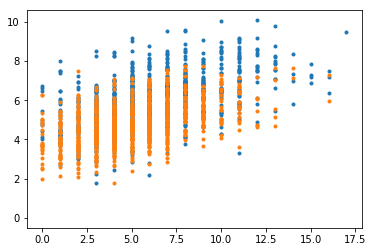

0.22037534977410805
2.022146451800311  Mean Absolute Error
---------------------------- BayesianRidge ----------------------------


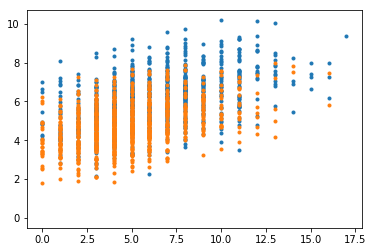

0.21490694937489396
2.0356154535432607  Mean Absolute Error
---------------------------- Ridge CV ----------------------------


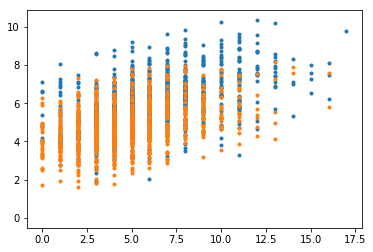

0.21651649304554133
2.0331963013473757  Mean Absolute Error


In [50]:

print('---------------------------- Lasso CV ----------------------------')
RegLassoCV(LassoCV, x_train, y_train, x_test, y_test)
print('---------------------------- BayesianRidge ----------------------------')
RegBay(BayesianRidge, x_train, y_train, x_test, y_test)
print('---------------------------- Ridge CV ----------------------------')
RegRidgeCV(RidgeCV, x_train, y_train, x_test, y_test)


# Treinamento com Número de Gols - Regressão

In [51]:
entrada = ['HomeTeam_', 'AwayTeam_', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult_','HTHomeGoals','HTAwayGoals']     
saida = ['FTHomeGoals', 'FTAwayGoals']
x, y = select_sets(dataset_converted, entrada, saida)
print('Atributos Entrada')
display(x.head())
print('Atributos Saída')
display(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=192)
x_train, y_train = Fduplicated(x_train, y_train)



/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Atributos Entrada


,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Blackpool,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,...,MeanShotsAway,B365H,B365D,B365A,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway,HTHomeGoals,HTAwayGoals
0,0,1,0,0,0,0,0,0,0,0,...,0.463285,0.026916,0.060,0.132156,0.377990,0.216507,0.283493,0.714115,0.0,0.2
1,0,0,0,1,0,0,0,0,0,0,...,0.407895,0.114964,0.025,0.028624,0.259569,0.604067,0.455742,0.348086,0.0,0.2
2,0,0,0,0,0,1,0,0,0,0,...,0.251273,0.053376,0.025,0.063642,0.270335,0.334928,0.584928,0.466507,0.0,0.2
3,0,0,0,0,0,0,0,0,0,0,...,0.144312,0.004106,0.350,0.604141,0.927033,0.184211,0.208134,0.671053,0.2,0.2
4,0,0,0,0,0,0,0,0,0,0,...,0.663837,0.096715,0.025,0.034714,0.464115,0.711722,0.391148,0.305024,0.0,0.6


Atributos Saída


,FTHomeGoals,FTAwayGoals
0,0,2
1,0,2
2,0,1
3,2,1
4,1,6


---------------------------- Lasso CV ----------------------------


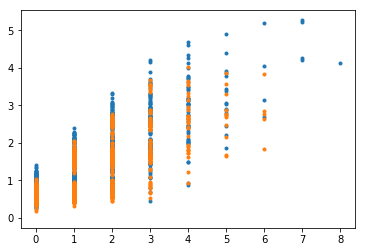

0.558532054878996
0.6845907717898994  Mean Absolute Error
---------------------------- BayesianRidge ----------------------------


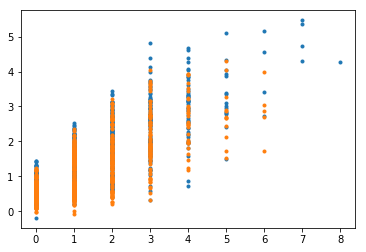

0.5580427644066117
0.6787116303172922  Mean Absolute Error
---------------------------- Ridge CV ----------------------------


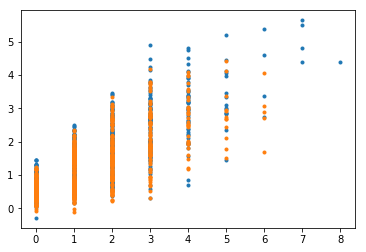

0.5585387975088574
0.6777629165412322  Mean Absolute Error


In [52]:

print('---------------------------- Lasso CV ----------------------------')
RegLassoCV(LassoCV, x_train, y_train, x_test, y_test)
print('---------------------------- BayesianRidge ----------------------------')
RegBay(BayesianRidge, x_train, y_train, x_test, y_test)
print('---------------------------- Ridge CV ----------------------------')
RegRidgeCV(RidgeCV, x_train, y_train, x_test, y_test)

# Treinamento com Número de Cartões Amarelos


In [53]:
entrada = ['HomeTeam_', 'AwayTeam_', 'Season', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult_','HTHomeGoals','HTAwayGoals',  'Referee_',  'MeanCardsHome', 'MeanCardsAway']     
saida = ['HomeTeamYellowCards',  'AwayTeamYellowCards']
x, y = select_sets(dataset_converted, entrada, saida)

print('Atributos Entrada')
display(x.head())
print('Atributos Saída')
display(y.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=39)
x_train, y_train = Fduplicated(x_train, y_train)

/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Atributos Entrada


,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Blackpool,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,...,B365D,B365A,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway,HTHomeGoals,HTAwayGoals,MeanCardsHome,MeanCardsAway
0,0,1,0,0,0,0,0,0,0,0,...,0.060,0.132156,0.377990,0.216507,0.283493,0.714115,0.0,0.2,0.387427,0.466374
1,0,0,0,1,0,0,0,0,0,0,...,0.025,0.028624,0.259569,0.604067,0.455742,0.348086,0.0,0.2,0.361111,0.255848
2,0,0,0,0,0,1,0,0,0,0,...,0.025,0.063642,0.270335,0.334928,0.584928,0.466507,0.0,0.2,0.584795,0.624269
3,0,0,0,0,0,0,0,0,0,0,...,0.350,0.604141,0.927033,0.184211,0.208134,0.671053,0.2,0.2,0.321637,0.453216
4,0,0,0,0,0,0,0,0,0,0,...,0.025,0.034714,0.464115,0.711722,0.391148,0.305024,0.0,0.6,0.361111,0.347953


Atributos Saída


,HomeTeamYellowCards,AwayTeamYellowCards
0,2,2
1,2,1
2,2,1
3,1,2
4,0,0


---------------------------- Lasso CV ----------------------------


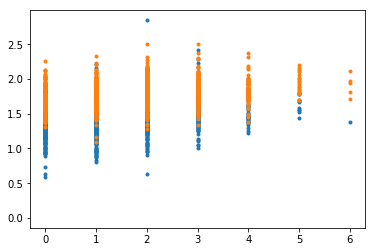

0.06883486834349861
0.9491974641450265  Mean Absolute Error
---------------------------- BayesianRidge ----------------------------


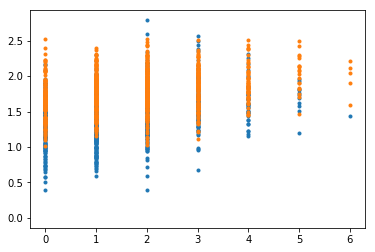

0.08441196854319055
0.9393439071350536  Mean Absolute Error
---------------------------- Ridge CV ----------------------------


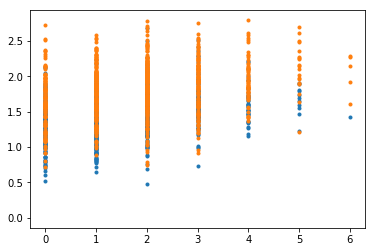

0.08490660159765584
0.9388252316879929  Mean Absolute Error


In [163]:

print('---------------------------- Lasso CV ----------------------------')
RegLassoCV(LassoCV, x_train, y_train, x_test, y_test)
print('---------------------------- BayesianRidge ----------------------------')
RegBay(BayesianRidge, x_train, y_train, x_test, y_test)
print('---------------------------- Ridge CV ----------------------------')
RegRidgeCV(RidgeCV, x_train, y_train, x_test, y_test)

# Treinamento - Vitória - Classificação

['HomeTeam', 'AwayTeam', 'FTResult', 'HTResult', 'Referee']
Feature being encoded HomeTeam...
Feature being encoded AwayTeam...
Feature being encoded HTResult...
Feature being encoded Referee...


/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Atributos Entrada


,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Blackpool,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,...,B365D,B365A,MeanGoalsHome,MeanGoalsAway,MeanGoalsConHome,MeanGoalsConAway,HTHomeGoals,HTAwayGoals,MeanCardsHome,MeanCardsAway
0,0,1,0,0,0,0,0,0,0,0,...,0.060,0.132156,0.377990,0.216507,0.283493,0.714115,0.0,0.2,0.387427,0.466374
1,0,0,0,1,0,0,0,0,0,0,...,0.025,0.028624,0.259569,0.604067,0.455742,0.348086,0.0,0.2,0.361111,0.255848
2,0,0,0,0,0,1,0,0,0,0,...,0.025,0.063642,0.270335,0.334928,0.584928,0.466507,0.0,0.2,0.584795,0.624269
3,0,0,0,0,0,0,0,0,0,0,...,0.350,0.604141,0.927033,0.184211,0.208134,0.671053,0.2,0.2,0.321637,0.453216
4,0,0,0,0,0,0,0,0,0,0,...,0.025,0.034714,0.464115,0.711722,0.391148,0.305024,0.0,0.6,0.361111,0.347953


Atributos Saída


,FTResult
0,A
1,A
2,A
3,H
4,A


{2: 2350, 0: 1634, 1: 1230}


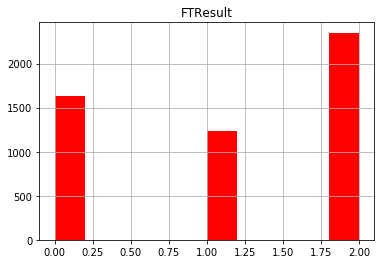

{2: 2350, 1: 2350, 0: 2350}


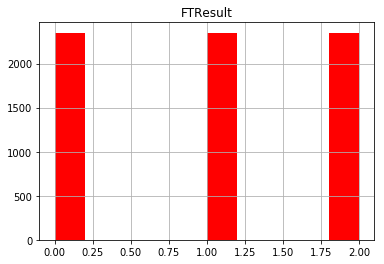

In [57]:
entrada = ['HomeTeam_', 'AwayTeam_', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult_','HTHomeGoals','HTAwayGoals',  'Referee_',  'MeanCardsHome', 'MeanCardsAway']     
saida = ['FTResult']

dataset_semi_converted = preprocess_features(dataset, ignore_list=['FTResult'])

x, y = select_sets(dataset_semi_converted, entrada, saida)
print('Atributos Entrada')
display(x.head())
print('Atributos Saída')
display(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=87, shuffle=True,  stratify=y)
x_train, y_train = Fduplicated(x_train, y_train)

train = x_train
y_train = pd.Categorical(y_train['FTResult']).codes
y_test = pd.Categorical(y_test['FTResult']).codes 


train['FTResult'] = y_train
plot_histogram_balancing(train, 'FTResult')

train = balance_classes_up_sampling(train, 'FTResult', 2.0,1.0)
train = balance_classes_up_sampling(train, 'FTResult', 2.0,0.0)

plot_histogram_balancing(train, 'FTResult')

x_train = np.array(train.drop(labels=['FTResult'],axis=1))
x_test = np.array(x_test)
y_train = np.array(train['FTResult'])
y_test = np.array(y_test)

##### KNN - K = 5

Training a KNeighborsClassifier using a training set size of 7050. . .
Trained model in 0.1664 seconds
Made predictions in 1.2875 seconds.
F1 score and accuracy score for test set: 0.5285 , 0.5285.


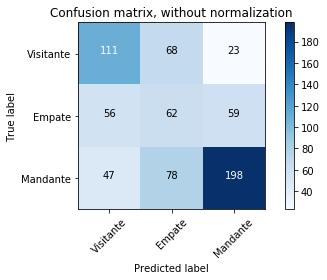

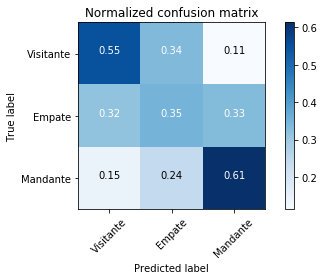

In [58]:
clf = KNeighborsClassifier(n_neighbors=5)
train_predict(clf, x_train, y_train, x_test, y_test, classes_=['Visitante', 'Empate', 'Mandante'])

## Decision Tree Classifier

Training a DecisionTreeClassifier using a training set size of 7050. . .
Trained model in 0.0975 seconds
Made predictions in 0.0006 seconds.
F1 score and accuracy score for test set: 0.6026 , 0.6026.


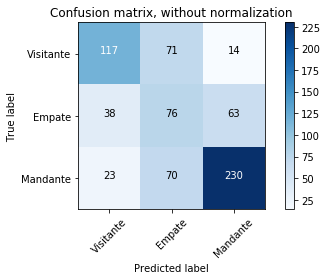

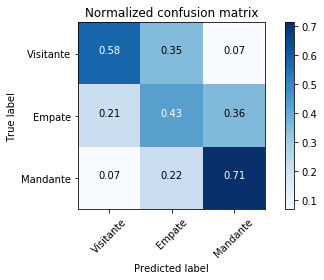

In [59]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=10, random_state = 100)
train_predict(clf, x_train, y_train, x_test, y_test, classes_=['Visitante', 'Empate', 'Mandante'])


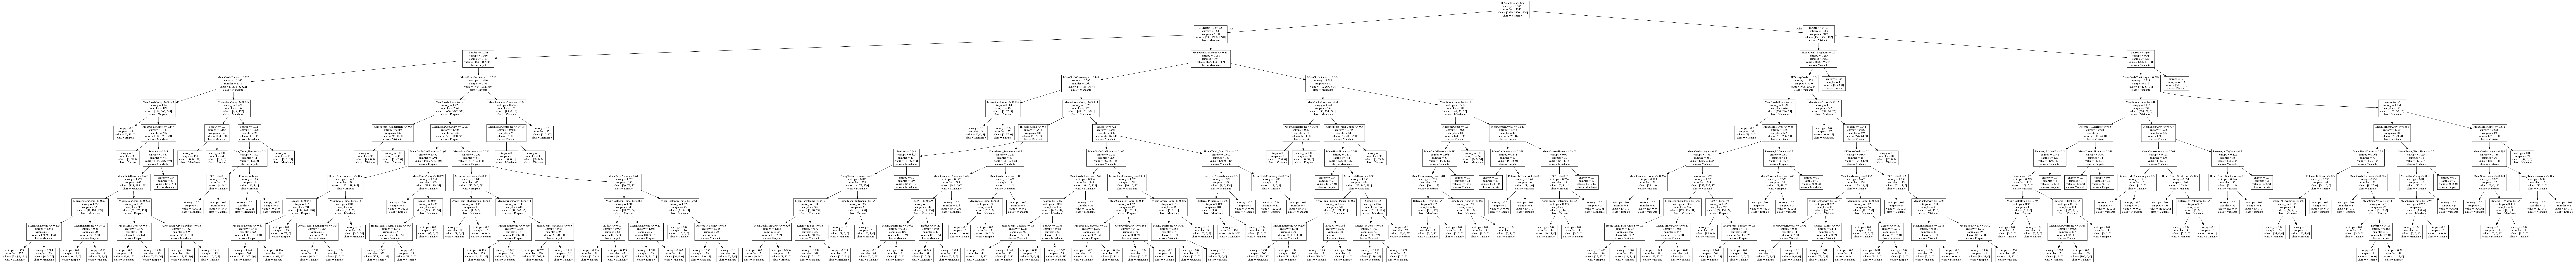

In [60]:
plot_decision_tree(clf,x.keys(),['Visitante','Empate', 'Mandante'])

## Logistic Regression

Training a LogisticRegression using a training set size of 7050. . .
Trained model in 0.1873 seconds
Made predictions in 0.0008 seconds.
F1 score and accuracy score for test set: 0.6311 , 0.6311.


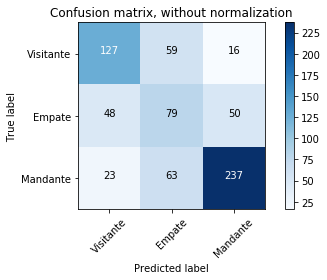

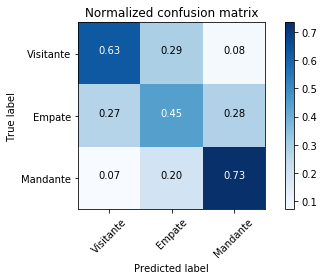

In [61]:
clf = LogisticRegression(random_state=50)
train_predict(clf, x_train, y_train, x_test, y_test, classes_=['Visitante', 'Empate', 'Mandante'])

## XGB Model


Training a XGBClassifier using a training set size of 7050. . .
Trained model in 5.6997 seconds
Made predictions in 0.0112 seconds.
F1 score and accuracy score for test set: 0.6709 , 0.6709.


/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


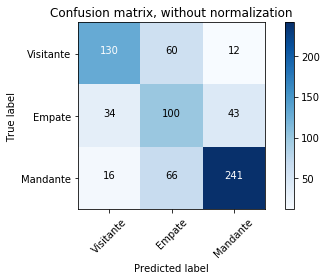

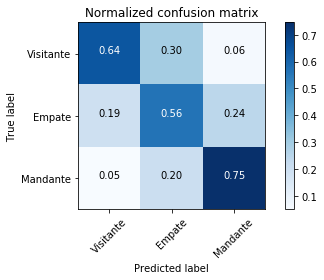

In [62]:
clf = xgb.XGBClassifier(seed = 82)
train_predict(clf, x_train, y_train, x_test, y_test, classes_=['Visitante', 'Empate', 'Mandante'])


# Treinamento - Vitória - Rede Neural

['HomeTeam', 'AwayTeam', 'FTResult', 'HTResult', 'Referee']
Feature being encoded HomeTeam...
Feature being encoded AwayTeam...
Feature being encoded HTResult...
Feature being encoded Referee...


/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5200
{2: 2350, 0: 1642, 1: 1208}


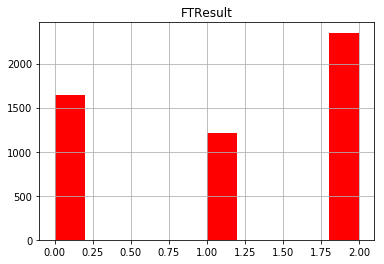

{2: 2350, 1: 2350, 0: 2350}


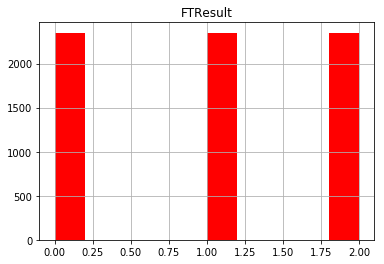

7050


In [86]:
entrada = ['HomeTeam_', 'AwayTeam_', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult_','HTHomeGoals','HTAwayGoals',  'Referee_',  'MeanCardsHome', 'MeanCardsAway']     
# entrada = ['HomeTeam', 'AwayTeam', 'Season', 'MeanCornersHome', 'MeanCornersAway', 'MeanShotsHome', 'MeanShotsAway', 'B365H', 'B365D', 'B365A', 'MeanGoalsHome', 'MeanGoalsAway','MeanGoalsConHome', 'MeanGoalsConAway', 'HTResult','HTHomeGoals','HTAwayGoals',  'Referee',  'MeanCardsHome', 'MeanCardsAway']     
saida = ['FTResult']

dataset_semi_converted = preprocess_features(dataset, ignore_list=['FTResult'])
# dataset_semi_converted = dummyEncode(dataset)
  
 
x, y = select_sets(dataset_semi_converted, entrada, saida)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=15, shuffle=True,  stratify=y)
x_train, y_train = Fduplicated(x_train, y_train)
train = x_train
y_train = pd.Categorical(y_train['FTResult']).codes
# y_train = y_train['FTResult']
y_test = pd.Categorical(y_test['FTResult']).codes 
# y_test = y_test['FTResult']

print(len(x_train))
train = x_train
train['FTResult'] = y_train
plot_histogram_balancing(train, 'FTResult')

train = balance_classes_up_sampling(train, 'FTResult', 2.0,1.0)
train = balance_classes_up_sampling(train, 'FTResult', 2.0,0.0)

plot_histogram_balancing(train, 'FTResult')

x_train = np.array(train.drop(labels=['FTResult'],axis=1))
y_train = np.array(train['FTResult'])

print(len(x_train))


5
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=15, shuffle=True, stratify=y_train)

# x_train = np.array(x_train)

# x_test = np.array(x_test)
# x_val = np.array(x_val)
y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)
y_val = np_utils.to_categorical(y_val, 3)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_449 (Dense)            (None, 80)                9920      
_________________________________________________________________
dropout_113 (Dropout)        (None, 80)                0         
_________________________________________________________________
dense_450 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_451 (Dense)            (None, 40)                3240      
_________________________________________________________________
dense_452 (Dense)            (None, 3)                 123       
Total params: 19,763
Trainable params: 19,763
Non-trainable params: 0
_________________________________________________________________


/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_shape=(123,), activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_shape=(123,), activation="relu", kernel_initializer="uniform")`
  
/home/suannyfabyne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_shape=(123,), activation="relu", kernel_initializer="uniform")`
  import sys


Train on 6168 samples, validate on 882 samples
Epoch 1/20
6168/6168 [==============================] - 8s 1ms/step - loss: 0.9524 - acc: 0.5107 - val_loss: 0.7741 - val_acc: 0.6474
Epoch 2/20
6168/6168 [==============================] - 2s 307us/step - loss: 0.8013 - acc: 0.6367 - val_loss: 0.7274 - val_acc: 0.6825
Epoch 3/20
6168/6168 [==============================] - 2s 311us/step - loss: 0.7711 - acc: 0.6573 - val_loss: 0.6959 - val_acc: 0.6961
Epoch 4/20
6168/6168 [==============================] - 2s 318us/step - loss: 0.7405 - acc: 0.6730 - val_loss: 0.6692 - val_acc: 0.7279
Epoch 5/20
6168/6168 [==============================] - 2s 306us/step - loss: 0.7237 - acc: 0.6804 - val_loss: 0.6638 - val_acc: 0.7313
Epoch 6/20
6168/6168 [==============================] - 2s 320us/step - loss: 0.6902 - acc: 0.7048 - val_loss: 0.6328 - val_acc: 0.7404
Epoch 7/20
6168/6168 [==============================] - 2s 305us/step - loss: 0.6863 - acc: 0.7043 - val_loss: 0.6244 - val_acc: 0.7483
Epo

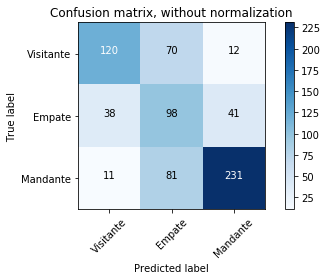

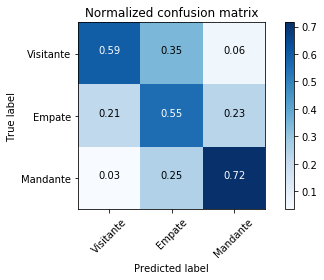

In [87]:
from keras.layers import Dense, Dropout
n_cols = x_train.shape[1]
model = Sequential()
model.add(Dense(80, input_shape=(n_cols,), init="uniform",activation="relu"))
model.add(Dropout(0.8, noise_shape=None, seed=None))
model.add(Dense(80, input_shape=(n_cols,), init="uniform",activation="relu"))
model.add(Dense(40, input_shape=(n_cols,), init="uniform",activation="relu"))
model.add(Dense(3, activation="softmax", kernel_initializer="random_normal"))
 
model.summary()
 
model.compile(
  optimizer = "adam",
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)
 
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20)
 
 
results = model.fit(
  x_train, y_train,
  epochs= 20,
  validation_data = (x_val, y_val),
  callbacks=[ES]
 )
 
y_pred = model.predict(x_test)
 
accuracy = metrics.accuracy_score(y_test.argmax(1), y_pred.argmax(1))
print(accuracy)
print("-------------------")
 
classes_=['Visitante', 'Empate', 'Mandante']
compute_confusion_matrix(confusion_matrix(y_test.argmax(1), y_pred.argmax(1)), classes_)
